## AIM: Decoder Plots

In [1]:
# to use cd, etc
import sys
import os

import numpy as np
# for math work
from numpy import linalg, matlib
# save, import and load data
from numpy import asarray, save, load

# needed for some matrix manipulations
import cvxpy as cp
# import math 

import scipy
# for curve fitting
from scipy import optimize
from scipy.io import loadmat  # this is the SciPy module that loads mat-files

from sklearn.metrics import r2_score, mean_squared_error

import mat73

import pandas as pd

import matplotlib.pyplot as plt
# for plots
import seaborn
# set up seaborn for the plots
seaborn.set()

# suppress deprecation warnings
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

# # to save data plots
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (8, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

### Set start and end days for session

In [3]:
sessStart = '072312'
sessEnd = '080412'

### Set up all paths

In [4]:
# decDir = 'decoderParams_jeev072312_080412.mat'
# nDir is trial-aligned to the go cue and uses all the trial data
# nDir = 'catNeuralDat_jeev072312_080412_trE5_B100.mat'
nDir = 'catNeuralDat_jeev' + sessStart + '_' + sessEnd + '_trE6_B100.mat'
kinDir = 'catBehaviorDat_jeev' + sessStart + '_' + sessEnd + '.mat' #catBehaviorDat_jeev072312_080412
decDir = 'decoderParams_jeev'+ sessStart + '_' + sessEnd + '.mat'
pathDir = '/Volumes/GoogleDrive/Shared drives/aoLab/Data/bmiLearning_jeev/jeev' + sessStart + '_' + sessEnd
os.chdir(pathDir)
os.getcwd()

'/Volumes/GoogleDrive/Shared drives/aoLab/Data/bmiLearning_jeev/jeev072312_080412'

In [5]:
nPath = pathDir + '/' + nDir
nDict = mat73.loadmat(nPath, use_attrdict=True)
nDict.keys()

dict_keys(['N_bmi', 'N_mc', 'N_norm_bmi', 'N_vfb', 'binvector', 'bmiDay', 'bmiDecoderInd', 'bmiDecoders', 'bmiSessions', 'bmiUnitInds', 'bmiUnitInds_all', 'bmiUnits', 'bmiUnits_all', 'day', 'days', 'mcDay', 'mcSessions', 'params', 'sessID_bmi', 'sessID_mc', 'sessID_vfb', 'sessions', 'trEs_bmi', 'trEs_mc', 'trEs_vfb', 'trTs_bmi', 'trTs_mc', 'trTs_vfb', 'vfbDay', 'vfbSessions'])

### Loading kinematic (cursor) data

In [6]:
kinPath = pathDir + '/' + kinDir
kinPath

'/Volumes/GoogleDrive/Shared drives/aoLab/Data/bmiLearning_jeev/jeev072312_080412/catBehaviorDat_jeev072312_080412.mat'

In [7]:
kinPath = pathDir + '/' + kinDir
kinDict = mat73.loadmat(kinPath, use_attrdict=True)
kinDict.keys()

dict_keys(['EPM', 'MD_sd', 'MD_w', 'ME_sd', 'ME_w', 'MS_sd', 'MS_w', 'MV_sd', 'MV_w', 'P', 'Plower', 'Psd', 'Pupper', 'RT_sd', 'RT_w', 'bmiDay', 'bmiDecoderInd', 'bmiDecoders', 'bmiSessions', 'bmiUnitInds', 'bmiUnitInds_all', 'bmiUnits', 'bmiUnits_all', 'day', 'days', 'epmTime', 'kinSegs', 'maxD_sd', 'maxD_w', 'mcDay', 'mcSessions', 'params', 'params1', 'rotKinSegs', 'segE', 'segT', 'sessID', 'sessID_epm', 'sessID_kin', 'sessType', 'sessions', 'stats', 'trTime', 'tr_e', 'tr_t'])

### Loading Decoder Data

In [8]:
decPath = pathDir + '/' + decDir
decPath

'/Volumes/GoogleDrive/Shared drives/aoLab/Data/bmiLearning_jeev/jeev072312_080412/decoderParams_jeev072312_080412.mat'

In [9]:
decPath = pathDir + '/' + decDir
decDict = mat73.loadmat(decPath, use_attrdict=True)
decDict.keys()

dict_keys(['H_MDp', 'H_MDv', 'H_PDp', 'H_PDv', 'Hs', 'K_MDp', 'K_MDv', 'K_PDp', 'K_PDv', 'Ks', 'Qs', 'bmiDay', 'bmiDecoderInd', 'bmiUnitInds', 'bmiUnitInds_all', 'bmiUnits', 'bmiUnits_all', 'sb', 'usedUnit_day', 'usedUnit_day_clean', 'usedUnit_decoder'])

### Plotting final cursor position

#### Total number of trials

#### First find all the successful trials only

In [13]:
succCol = kinDict['tr_e'].shape[-1] - 2
succIdx = np.where((kinDict['tr_e'][:, succCol] == 8) | (kinDict['tr_e'][:, succCol] == 9))[0]
print("number of successful trials: ", succIdx.shape)
print(succIdx-1)

# kinData is the kinematic data for the successful trials only
kinData = np.array(kinDict['kinSegs'], dtype=object)[succIdx - 1]
print(kinData.shape)

number of successful trials:  (9730,)
[   0    4   13 ... 9823 9824 9825]
(9730,)


#### Plot the first xxx time of the cursor position

Text(0, 0.5, 'y (cm)')

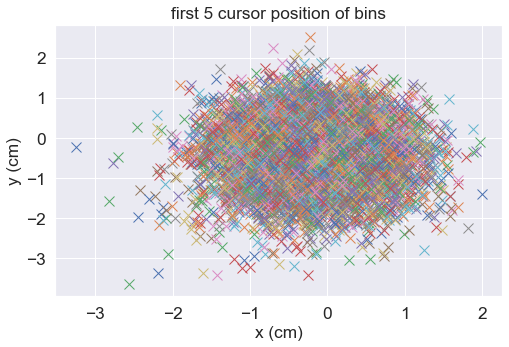

In [15]:
first_bins = 5
first_cursor = np.zeros((len(kinData), 2))

for idx, val in enumerate(kinData):
#     last_cursor[idx, :, :] = kinData[idx][-last_bins:, 0:1]
    first_cursor[idx, 0] = np.mean(kinData[idx][0:first_bins, 0], axis=0)
    first_cursor[idx, 1] = np.mean(kinData[idx][0:first_bins, 1], axis=0)
    plt.plot(first_cursor[idx, 0], first_cursor[idx,1],'x', markersize=10)
plt.title("first 5 cursor position of bins")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")

Text(0, 0.5, 'y (cm)')

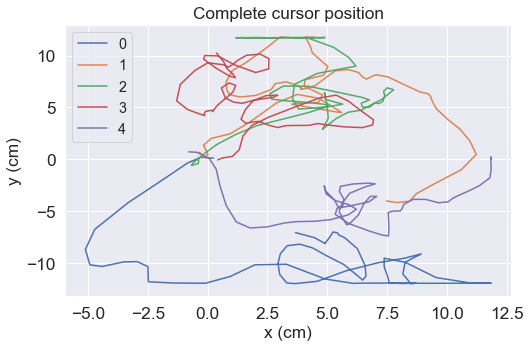

In [16]:
last_bins = 5
last_cursor = np.zeros((len(kinData), last_bins, 2))

for idx in range(5):
#     last_cursor[idx, :, :] = kinData[idx][-last_bins:, 0:1]
    plt.plot(kinData[idx][:, 0], kinData[idx][:,1],label=idx)
plt.title("Complete cursor position")
plt.legend()
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")

Text(0, 0.5, 'y (cm)')

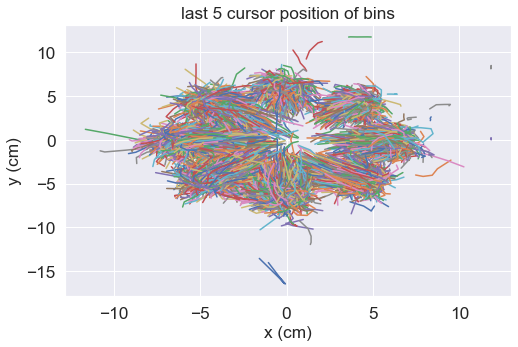

In [17]:
last_bins = 5

for idx, val in enumerate(kinData):
#     last_cursor[idx, :, :] = kinData[idx][-last_bins:, 0:1]
    plt.plot(kinData[idx][-last_bins:, 0], kinData[idx][-last_bins:,1])
plt.title("last 5 cursor position of bins")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")

#### Plot the average of the last xxx time bins of the cursor position

Text(0, 0.5, 'y (cm)')

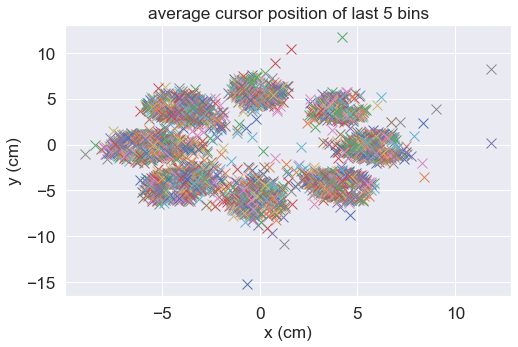

In [18]:
last_cursor = np.zeros((len(kinData), 2))
for idx, val in enumerate(kinData):
#     last_cursor[idx, :, :] = kinData[idx][-last_bins:, 0:1]
    last_cursor[idx, 0] = np.mean(kinData[idx][-last_bins:, 0], axis=0)
    last_cursor[idx, 1] = np.mean(kinData[idx][-last_bins:, 1], axis=0)
    
    plt.plot(last_cursor[idx, 0], last_cursor[idx, 1], 'x', markersize = 10)
plt.title("average cursor position of last " + str(last_bins) + " bins")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")

check if the circles are the radius of the target --> check the circle size to see the diameter

because 5 bins = 500 ms and that's longer than the hold time

### Find corresponding firing rates coming into the decoder

#### Loading neural data

In [19]:
nPath = pathDir + '/' + nDir
nDict = mat73.loadmat(nPath, use_attrdict=True)
nDict.keys()

dict_keys(['N_bmi', 'N_mc', 'N_norm_bmi', 'N_vfb', 'binvector', 'bmiDay', 'bmiDecoderInd', 'bmiDecoders', 'bmiSessions', 'bmiUnitInds', 'bmiUnitInds_all', 'bmiUnits', 'bmiUnits_all', 'day', 'days', 'mcDay', 'mcSessions', 'params', 'sessID_bmi', 'sessID_mc', 'sessID_vfb', 'sessions', 'trEs_bmi', 'trEs_mc', 'trEs_vfb', 'trTs_bmi', 'trTs_mc', 'trTs_vfb', 'vfbDay', 'vfbSessions'])

### Functions to use

#### Return only units used in BMI

In [20]:
def findBmiUnitsOnly(neuronData_dict, neural_bmi_matx):
    n_bmi = neural_bmi_matx
    # n_bmi = num time bins x num neurons total x trials (total)

    # off by one, python to matlab
    # find the units that I care about (bmiUnitsInds_all)
    n_units = neuronData_dict['bmiUnitInds_all'] - 1
    n_units = n_units.astype('int')
    print("Units that we care about:", n_units)

    # should be the same as the number of units in bmiUnitsInds_all
    n_bmiUnits = n_bmi[:, n_units, : ];

    n_shape = n_bmiUnits.shape
    print("shape of n_bmiUnits:", n_shape)
    if n_shape[1] != neuronData_dict['bmiUnitInds_all'].size:
        print("error in converting n_bmiUnits")
        return 0
    else:
        return n_bmiUnits

#### Return Least-Squares Ax - b, return A

In [21]:
def findA_leastSquares(b, x):
    m = b.shape[0] # b = m x T
    n = x.shape[0] # x = n X T
    A = cp.Variable((m, n)) # A.value = none here
    cost = cp.sum_squares(A @ x - b)
    prob = cp.Problem(cp.Minimize(cost))
    optimalValue = prob.solve()
    resdVect = A@x-b
    return (A, optimalValue, resdVect)

In [22]:
def linear_fit(x_, k_matrix):
    print("linear fit: ", x_.shape)
    return k_matrix*x_

def curveFitting(func_arg, x_data, y_data):
    params, params_covariance = optimize.curve_fit(func_arg, x_data, y_data) 
    return (params, params_covariance)

#### Separate out data by decoder

In [23]:
def getTrialsByDecoder(n_dict):
    # separate into decoders
    sessID_bmi = n_dict['sessID_bmi'] 
    bmiDecInd = n_dict['bmiDecoderInd']
    numTrials = n_dict['trEs_bmi'].shape[0]
    
    print(sessID_bmi)
    print(sessID_bmi.shape)
    print(bmiDecInd)
    print(bmiDecInd.shape)
    print(numTrials)
    numberSession = int(max(sessID_bmi))
    print("Number of Sessions:", numberSession)
    numberDecoders = int(max(bmiDecInd))
    print("Number of Decoders:", numberDecoders)
    bmiDecTrial = np.zeros(numTrials)
    # take value of sessID_bmi --> val_sessID
    # replace with the value of bmiDecInd at index of (val_sessID)

    sessID_bmiOff = sessID_bmi - 1
    bmiDecTrial = bmiDecInd[sessID_bmiOff.astype(int)]

    # print number of trials in each session
    trialsBySession = np.zeros(numberSession)
    trialsByDecoder = np.zeros(numberDecoders)
    for iT in range(numberSession):
        print("Session ID:", iT + 1) # off by one for matlab
        print("Decoder Used: ", int(bmiDecInd[iT]))
    #     print(np.where(sessID_bmiOff == iT)) # also off by one in matlab
        print("Total Number of Trials in Sessions: ", sum(sessID_bmiOff == iT))
        trialsBySession[iT] = sum(sessID_bmiOff == iT)
    #     print(int(bmiDecInd[iT]))
        trialsByDecoder[int(bmiDecInd[iT]) - 1] = trialsByDecoder[int(bmiDecInd[iT]) - 1] + sum(sessID_bmiOff == iT)

    print(trialsByDecoder)

    # bmiDecTrial is a trial num x 1 vector that assigs each trial to a decoder
    plt.plot(bmiDecTrial, '.')
    plt.title("Trials by Decoder Visualization")
    plt.xlabel("Trial Number")
    
    return (bmiDecTrial, trialsByDecoder, trialsBySession)


#### Find r-squared

In [24]:
def return_r2(y, y_est):
    ss_res = np.sum((y - y_est) ** 2)

    # total sum of squares
    ss_tot = np.sum((y - np.mean(y)) ** 2)

    # r-squared
    r2 = 1 - (ss_res / ss_tot)
    
    return(r2)

#### Standardize array (set mean = 0)

In [25]:
# rescale to mean 0
def standardizeArray(array_in):
    return (array_in - np.mean(array_in))/ (np.max(array_in) - np.min(array_in))    

### Back to code

#### Using only successful trials and summing over xxx time bins

[ 1.  1.  1. ... 30. 30. 30.]
(9827,)
[1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 4. 5. 5. 5. 6. 7. 7. 7. 7. 7. 7.
 7. 8. 8. 8. 8. 9.]
(30,)
9827
Number of Sessions: 30
Number of Decoders: 9
Session ID: 1
Decoder Used:  1
Total Number of Trials in Sessions:  17
Session ID: 2
Decoder Used:  1
Total Number of Trials in Sessions:  8
Session ID: 3
Decoder Used:  1
Total Number of Trials in Sessions:  16
Session ID: 4
Decoder Used:  2
Total Number of Trials in Sessions:  337
Session ID: 5
Decoder Used:  2
Total Number of Trials in Sessions:  304
Session ID: 6
Decoder Used:  2
Total Number of Trials in Sessions:  264
Session ID: 7
Decoder Used:  2
Total Number of Trials in Sessions:  432
Session ID: 8
Decoder Used:  2
Total Number of Trials in Sessions:  327
Session ID: 9
Decoder Used:  2
Total Number of Trials in Sessions:  327
Session ID: 10
Decoder Used:  2
Total Number of Trials in Sessions:  64
Session ID: 11
Decoder Used:  3
Total Number of Trials in Sessions:  491
Session ID: 12
Decoder U

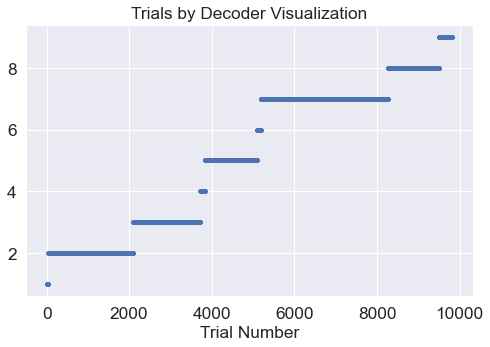

In [27]:
n_bmiUnitsDec, bmiTrialsPerDecoder, bmiTrialsPerSession = getTrialsByDecoder(nDict)

In [28]:
n_bmiUnits = findBmiUnitsOnly(nDict, nDict['N_norm_bmi']/.1) # divide by .1 to convert spikes/100 ms to Hz
nData = n_bmiUnits[:, :, succIdx - 1]
successDec = n_bmiUnitsDec[succIdx - 1]
print(nData.shape)
print(successDec.shape)

# check: does this shape match kinData?
assert nData.shape[-1] == kinData.shape[-1],  "error in successful trial shapes"

Units that we care about: [ 50  85 105 140 145 215 220 225 270 300 355 395 440 520 545 590 595 610
 635]
shape of n_bmiUnits: (40, 19, 9827)
(40, 19, 9730)
(9730,)


In [29]:
alignCue = np.where((nDict['binvector'] < .000001) & (nDict['binvector'] > -.000001) == 1)[0][0]
print("align cue = ", alignCue)
print("max events = ", len(nDict['binvector']) )
nDict['binvector']

align cue =  20
max events =  40


array([-2.00000000e+00, -1.90000000e+00, -1.80000000e+00, -1.70000000e+00,
       -1.60000000e+00, -1.50000000e+00, -1.40000000e+00, -1.30000000e+00,
       -1.20000000e+00, -1.10000000e+00, -1.00000000e+00, -9.00000000e-01,
       -8.00000000e-01, -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
       -4.00000000e-01, -3.00000000e-01, -2.00000000e-01, -1.00000000e-01,
       -2.22044605e-16,  1.00000000e-01,  2.00000000e-01,  3.00000000e-01,
        4.00000000e-01,  5.00000000e-01,  6.00000000e-01,  7.00000000e-01,
        8.00000000e-01,  9.00000000e-01,  1.00000000e+00,  1.10000000e+00,
        1.20000000e+00,  1.30000000e+00,  1.40000000e+00,  1.50000000e+00,
        1.60000000e+00,  1.70000000e+00,  1.80000000e+00,  1.90000000e+00])

### Using Least-squares to solve for the decoder K

- one K for each trial
- solving: min(Ax-b) become min(Kf - y)
- where A = K and is target dimension (m) x neurons size (n)
- b = target position data --> but stacked, so vstack(y0, y1.....yend, t)
- x = firing rate data --> stacked, vstack (f0, f1....fend, t); each firing rate 
- this outputs: return (A, optimalValue, resdVect)

### Setting up neural activity matrix

In [30]:
nData.shape

(40, 19, 9730)

[ 1.  1.  1. ... 30. 30. 30.]
(9827,)
[1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 4. 5. 5. 5. 6. 7. 7. 7. 7. 7. 7.
 7. 8. 8. 8. 8. 9.]
(30,)
9827
Number of Sessions: 30
Number of Decoders: 9
Session ID: 1
Decoder Used:  1
Total Number of Trials in Sessions:  17
Session ID: 2
Decoder Used:  1
Total Number of Trials in Sessions:  8
Session ID: 3
Decoder Used:  1
Total Number of Trials in Sessions:  16
Session ID: 4
Decoder Used:  2
Total Number of Trials in Sessions:  337
Session ID: 5
Decoder Used:  2
Total Number of Trials in Sessions:  304
Session ID: 6
Decoder Used:  2
Total Number of Trials in Sessions:  264
Session ID: 7
Decoder Used:  2
Total Number of Trials in Sessions:  432
Session ID: 8
Decoder Used:  2
Total Number of Trials in Sessions:  327
Session ID: 9
Decoder Used:  2
Total Number of Trials in Sessions:  327
Session ID: 10
Decoder Used:  2
Total Number of Trials in Sessions:  64
Session ID: 11
Decoder Used:  3
Total Number of Trials in Sessions:  491
Session ID: 12
Decoder U

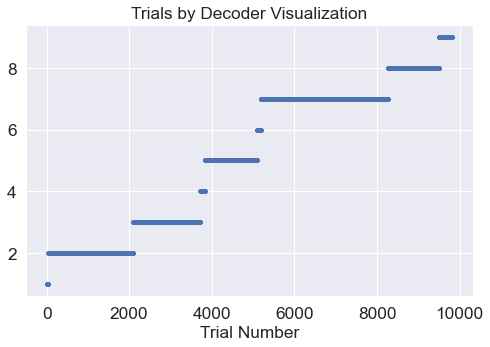

In [31]:
n_bmiUnitsDec, bmiTrialsPerDecoder, bmiTrialsPerSession = getTrialsByDecoder(nDict)

In [32]:
frData = nData[alignCue:, :, :]
frData.shape
# time bins x neurons x trials

(20, 19, 9730)

In [33]:
fr_0 = frData[:, :, 1]
fr_0.shape

(20, 19)

In [50]:
y_0 = kinData[1]
y_ = np.zeros((fr_0.shape[0], y_0.shape[-1]))
for iD in range(k_0.shape[-1]):
    y_[:, iD] = np.interp(np.linspace(0,1,20), np.linspace(0, 1, y_0.shape[0]), y_0[:, iD])
y_ = y_.T

In [51]:
y_.shape

(4, 20)

In [52]:
np.linalg.pinv(fr_0).shape

(19, 20)

In [55]:
K = (y_)@(np.linalg.pinv(fr_0).T)

In [57]:
K.shape

(4, 19)

In [60]:
yest = K@fr_0.T
yest.shape

(4, 20)

In [61]:
mean_squared_error(yest, y_)

0.15520226380088895

### Across all trials

In [73]:
numTrials = frData.shape[-1]
K_ = np.zeros((4, 19, numTrials))
y_ = np.zeros((4, 20, numTrials)) # 4 x 20 x T
ypred = np.zeros((4, 20, numTrials))

for iT in range(numTrials):
    fr = frData[:, :, iT].T #19 x 20
    y_0 = kinData[iT]
    yinter = np.zeros((4, 20))
    for iD in range(4):
        yinter[iD, :] = np.interp(np.linspace(0,1,20), np.linspace(0, 1, y_0.shape[0]), y_0[:, iD])
    y_[:, :, iT] = yinter #20 x 4
    K_[:, :, iT] =  y_[:, :, iT]@np.linalg.pinv(fr)
    ypred[:, :, iT] = K_[:, :, iT]@fr

### $r^2$ of the K

- we are very linear with $r^2$=0.98 ish

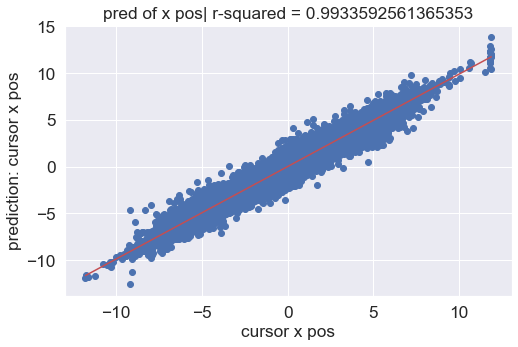

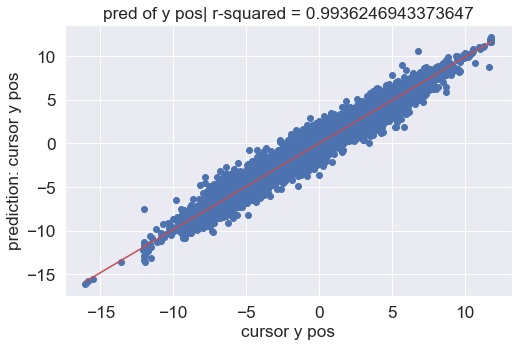

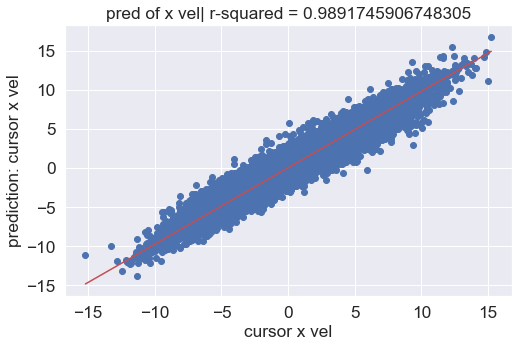

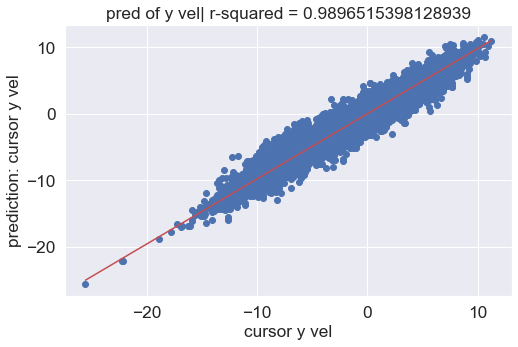

In [87]:
def plot_r2(xdata, ydata,label):
    plt.scatter(xdata, ydata)
    slope, intercept, r, p, se = scipy.stats.linregress(np.ndarray.flatten(xdata), np.ndarray.flatten(ydata))
    
    plt.plot(np.linspace(min(np.sort(np.ndarray.flatten(xdata))),max(np.sort(np.ndarray.flatten(xdata))),10),np.linspace(min(np.sort(np.ndarray.flatten(xdata))),max(np.sort(np.ndarray.flatten(xdata))),10)*slope+ intercept,'r')
    plt.xlabel("cursor " + str(label))
    plt.ylabel("prediction: cursor " + str(label))
    plt.title("pred of "+ str(label) + "| r-squared = " + str(r))
    plt.show()

plot_r2(y_[0], ypred[0], "x pos")
plot_r2(y_[1], ypred[1], "y pos")
plot_r2(y_[2], ypred[2], "x vel")
plot_r2(y_[3], ypred[3], "y vel")

### Is the Kalman Filter adapting like stochastic gradient descent?

In [91]:
def sg(c,u,N,D):
  """
  stochastic gradient
  Dc ~= (1/N) * sum( [(c(u+d[n]) - c(u-d[n])) * d[n] / |d[n]|] for n in range(N) )

  inputs:
    c : U -> R
    u in U - decision variable in vector space U
    N - int - number of samples
    D > 0 - size of displacement

  outputs:
    Dc in N x U - approximations of gradient
  """
  # create displacements
  d = np.random.randn(N,u.size)
  #d /= np.linalg.norm(d,axis=1)[:,np.newaxis]
  d *= D
  d.reshape(tuple([N]+list(u.shape)))
  # compute stochastic gradient
  Dc = np.zeros_like(d)
  for n in range(N):
    Dc[n] = (c(u+d[n]) - c(u-d[n])) * d[n] 
  Dc /= 2*D**2
  return Dc

def gd(c,u0,Dc,g,I):
  """
  gradient descent
  for i in I:
    u -= g(u)*Dc(u)

  inputs:
    c : U -> R
    u0 in U - decision variable in vector space U
    g(u,i) > 0 - step size
    I - int - number of iterations

  outputs:
    U in I x U
  """
  U = np.nan*np.zeros((I,u0.size))
  U.reshape(tuple([I]+list(u0.shape)))
  U[0] = u0
  for i in range(I-1):
    U[i+1] = U[i] - g(U[i],i) * Dc(U[i])
  return U

def PSD(n,sqrt=False):
  """
  compute random positive semidefinite matrix

  input:
    n - int - dimension of matrix
    (optional)
    sqrt - bool - whether to return S such that Q = np.dot( S.T, S)

  output:
    Q - n x n - Q = Q^T,  spec Q \subset [0,oo)
  """
  H = np.random.randn( n, n )
  d,u = np.linalg.eig( H + H.T )
  d *= np.sqrt(np.arange(d.size)+.1)
  S = np.dot( u, np.dot( np.diag( np.sqrt( d*np.sign( d ) ) ), u.T ) )
  Q = np.dot( S.T, S )
  if sqrt:
    return Q, S
  else:
    return Q

In [ ]:
N = 100
D = 1e-1
lamba_k = .001

# u is each K
c = lambda e, u : np.linalg.norm(e, 2)**2 + lamba_k*np.linalg.norm(u, 2)**2 

In [137]:
# final kalman state 
ylast = np.zeros((numTrials, 2))
for ii in range(numTrials):
    ylast[ii] = np.mean(kinData[ii][-last_bins:, 0:1], axis=0)

# target position
targs = np.zeros((numTrials, 2))
targIn = kinDict['segE'][succIdx-1,1]-63
targs[:, 0] = np.cos( (targIn-1)*np.pi/4)
targs[:, 1] = np.sin( (targIn-1)*np.pi/4)

re = targs-ylast

In [140]:
# data = [y_, ypred, K_, targs, ylast]
# path = '/Users/mmadduri/Documents/PhD/ResearchMaterials/Code/BMI_Model/'
# np.savez(path + "2021Jul19data.npz", data)
import pickle as pickle
data = [y_, ypred, K_, targs, ylast]
path = '/Users/mmadduri/Documents/PhD/ResearchMaterials/Code/BMI_Model/'
with open(path + '2021Jul19data.pkl', 'wb') as outfile:
    pickle.dump(data, outfile, pickle.HIGHEST_PROTOCOL)

In [132]:
np.cos( (targIn-1)*np.pi/4)

array([7., 1., 1., 1., 6.])

In [90]:
Dc = lambda u : sg(c,u,N,D).mean(axis=0)
g = lambda u,i : 1e-1#/(i+1)
I = 20

U_ = []
cU_ = []
for _ in range(100):
  u0 = np.array([np.random.uniform(xlim[0],xlim[1])])
  U_.append(gd(c,u0,Dc,g,I))
  cU_.append(c(U_[-1]))
U_ = np.asarray(U_)
cU_ = np.asarray(cU_)

NameError: name 'xlim' is not defined

In [95]:
np.linalg.norm(K_[0], 2)

57.638182389929284

In [94]:
K_.shape

(4, 19, 9730)

In [105]:
numTrials = frData.shape[-1]
nMatrix = np.zeros((numTrials, ))
for iT in range(numTrials):
    nMatrix[iT]

1.0

In [107]:
numTrials = frData.shape[-1]
Krep = np.zeros((5, 19, numTrials))
for iT in range(numTrials):
    decNum = int(successDec[iT])-1
    Krep[:, :, iT] = Ks[:, :, decNum]

In [108]:
Krep.shape

(5, 19, 9730)

In [75]:
# just assume that you're starting at alignCue 
kinData[0].shape

(73, 4)

#### Using least-squares to solve for the decoder parameter


- solving: min(Ax-b) become min(Kf - y)
- where A = K and is target dimension (m) x neurons size (n)
- b = target position data
- x = firing rate data
- this outputs: return (A, optimalValue, resdVect)

So what I do is:
- separate by decoder
- batch by trials of ~20 within each decoder
- solve for multiple K's
- plot the heatmap of those K's changing

In [19]:
n_bmiUnitsDec, bmiTrialsPerDecoder, bmiTrialsPerSession = getTrialsByDecoder(nDict)

NameError: name 'getTrialsByDecoder' is not defined

#### That doesn't look helpful, let's try to separate by decoder

In [24]:
# TODO: verify this is true for successful trials
decTrials = np.zeros(len(bmiTrialsPerDecoder))

stVal = 0
for idx,val in enumerate(bmiTrialsPerDecoder):
    print(idx, val)
    decTrials[idx] = val + stVal
    stVal = decTrials[idx]

print(decTrials)

0 41.0
1 2056.0
2 1626.0
3 112.0
4 1264.0
5 90.0
6 3076.0
7 1236.0
8 327.0
[  41. 2097. 3723. 3835. 5099. 5189. 8265. 9501. 9828.]


#### Set firing rate data to be the sum of all data from align cue to last bins

In [25]:
# frData = np.sum(nData[alignCue:-5, :, :], axis=0)

frData = standardizeArray(np.sum(nData[alignCue:alignCue+5, :, :], axis=0))

#### Solving for a K using all the data over the entire decoder for each decoder in a session (so could be ~2000 data points)

In [70]:
for idx,val in enumerate(bmiTrialsPerDecoder):
    print(val)

41.0
2056.0
1626.0
112.0
1264.0
90.0
3076.0
1236.0
327.0


In [26]:
trStart = 0
numTrials = last_cursor.shape[0]
K_trials = []
K_all = []
for idx,val in enumerate(bmiTrialsPerDecoder):
    trEnd = int(val)
    b = last_cursor[trStart:trStart+trEnd,:].T # should be target x #trials
    x = frData[:, trStart:trStart+trEnd]
    (K, optVal, resdVect) = findA_leastSquares(b, x)
    K_trials.append(K.value.flatten())
    K_all.append(K.value)
    trStart = trEnd    

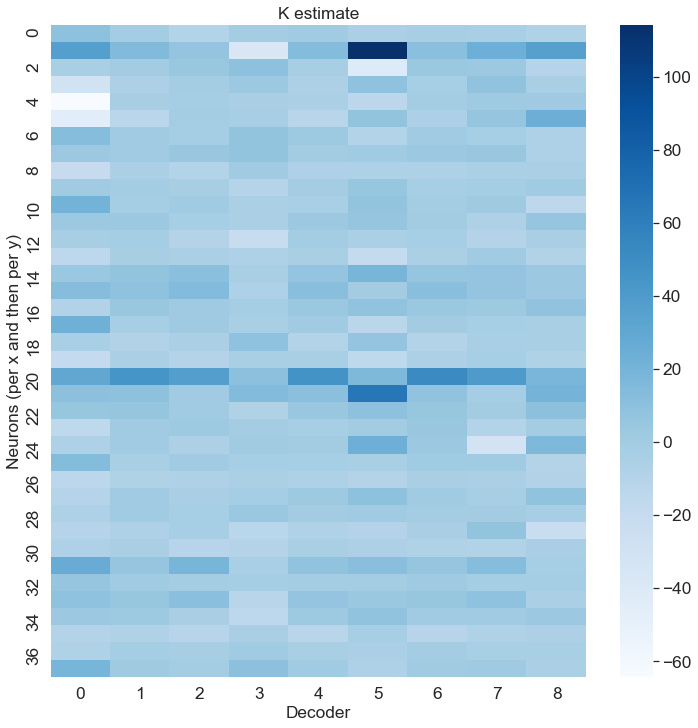

In [27]:
K_tr = np.array(K_trials)
fig= plt.figure(figsize=(12,12))

seaborn.heatmap(K_tr.T, cmap="Blues")
plt.xlabel("Decoder")
plt.ylabel("Neurons (per x and then per y)")
plt.title("K estimate")
plt.show()

#### Now I have an estimate for K, need to figure out the r-squared for y_est = (K_est)(actual firing rate) and y_act

In [28]:
print("target shape: ", last_cursor.shape)
print("firing rate shape: ", frData.shape)
K_ = np.array(K_all)
print("K est shape: ", K_.shape)

target shape:  (9730, 2)
firing rate shape:  (19, 9730)
K est shape:  (9, 2, 19)


In [29]:
frData[:, 1].shape

(19,)

In [30]:
# [  41. 2097. 3723. 3835. 5099. 5189. 8265. 9501. 9828.]
mse_trials = np.zeros(numTrials)
for iT in range(numTrials):
    k_num = np.min(np.where(iT<decTrials))
    # estimate target position
    k_est = K_[k_num, :, :]
    y_est = k_est@frData[:,iT]
    # actual target position
#     y = last_cursor[iT, :]
    y = first_
    mse_trials[iT] = mean_squared_error(y, y_est)
    

In [68]:

for iT in range(100,110,1):
    k_num = np.min(np.where(iT<decTrials))
    # estimate target position
    k_est = K_[k_num, :, :]
    y_est = k_est@frData[:,iT]
    print("y_est: ", y_est)
    # actual target position
#     y = [kinData[iT][-3, 0], kinData[iT][-3, 1]]
    print("y start: ", [kinData[iT][0:5, 0]])
    print("y end: ", [kinData[iT][-5:, 0]])
    print("")
#     mse_trials[iT] = mean_squared_error(y, y_est)
    

y_est:  [-2.94198357  0.41067391]
y start:  [array([ 0.32954406, -0.02991178, -0.19983082,  0.03429393,  0.24246181])]
y end:  [array([-0.60688377, -1.33146809, -2.02351526, -2.56308965, -3.24413218])]

y_est:  [-1.05518901  0.94390308]
y start:  [array([-0.04956661,  0.84323459,  1.57344841,  2.30928016,  2.76959416])]
y end:  [array([-0.29681472, -1.37124522, -2.11236519, -2.96660119, -3.90465722])]

y_est:  [-0.93280859 -0.29420921]
y start:  [array([-0.238804  , -0.52259206, -0.56617025, -0.45229403, -0.22959208])]
y end:  [array([-4.39451092, -3.89878665, -3.43180718, -3.23013637, -3.3809554 ])]

y_est:  [-1.43409693 -0.61842894]
y start:  [array([0.1506117 , 0.66238559, 0.99240798, 1.36401851, 1.25985858])]
y end:  [array([-1.6487721 , -2.3524596 , -3.13130127, -4.02446314, -4.65705979])]

y_est:  [-2.07350539  0.60800916]
y start:  [array([-0.28671208, -0.02948517,  0.36973743,  0.86256982,  0.96223891])]
y end:  [array([-0.25624831, -1.14336396, -2.16993708, -3.23772266, -4.429

#### MSE of K per decoder

Text(0.5, 1.0, 'MSE for y_est vs y, separated by decoders')

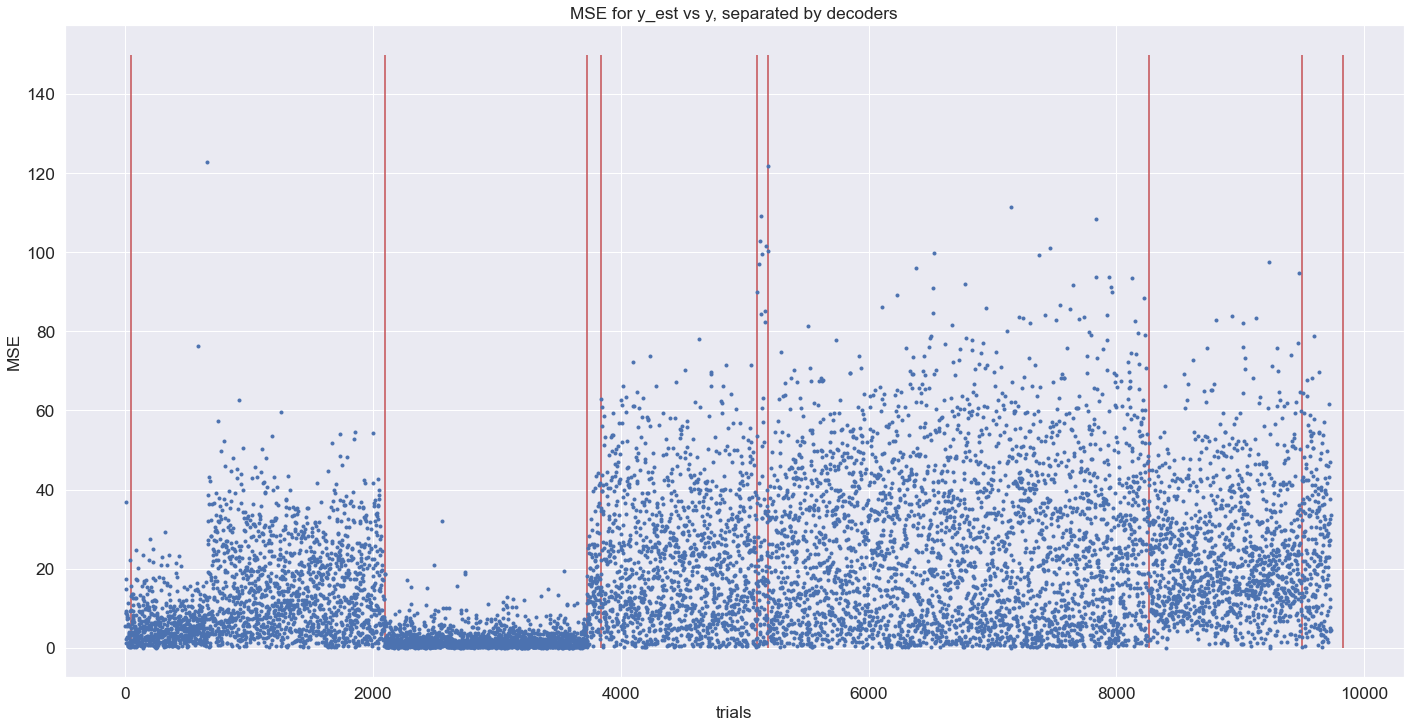

In [34]:
fig= plt.figure(figsize=(24,12))

plt.vlines(decTrials, 0, 20, 'r')
plt.plot(mse_trials, '.')
plt.ylabel("MSE")
plt.xlabel("trials")
plt.title("MSE for y_est vs y, separated by decoders")

#### Try changing the way we find K....

- take average of previous ~20 batches (t-21:t-1) to estimate a K at time t

In [ ]:
trStart = 0
numTrials = last_cursor.shape[0]
K_trials = []
K_all = []
for iT in range(binSize, numTrials, 1):
    trEnd = iT
    trStart = iT - binSize
    b = np.mean(last_cursor[trStart:trEnd,:], axis=0).T # should be target x #trials
    x = np.mean(frData[:, trStart:trEnd], axis=1)
    (K, optVal, resdVect) = findA_leastSquares(b, x)
    K_all.append(K.value)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/mmadduri/.pyenv/versions/3.8.5/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-112-6a96efffb057>", line 5, in <module>
    for iT in range(binSize, numTrials, 1):
NameError: name 'binSize' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/mmadduri/.pyenv/versions/3.8.5/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2045, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/mmadduri/.pyenv/versions/3.8.5/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1170, in get_records
    return _fixed_getinnerframes(etb, number_of_

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/mmadduri/.pyenv/versions/3.8.5/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-112-6a96efffb057>", line 5, in <module>
    for iT in range(binSize, numTrials, 1):
NameError: name 'binSize' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/mmadduri/.pyenv/versions/3.8.5/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2045, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/mmadduri/.pyenv/versions/3.8.5/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
    if (await self.run_code(code, res

In [ ]:
numTrials-9690

In [ ]:
K_.shape

In [ ]:
K_ = np.array(K_all)
# [  41. 2097. 3723. 3835. 5099. 5189. 8265. 9501. 9828.]
r2_trials = np.zeros(numTrials)

# starting for loop at binSize + 10
for iT in range(40, numTrials-1, 1):
    # estimate target position
    k_est = K_[iT-40]
    
    y_est = k_est@frData[:, iT]
    # actual target position
    y = last_cursor[iT, :]
    r2_trials[iT] = return_r2(y, y_est)
    if (r2_trials[iT] < 0):
        r2_trials[iT] = 0

In [ ]:
len(np.where(r2_trials==0)[0])

In [ ]:
fig= plt.figure(figsize=(24,12))

plt.vlines(decTrials, 0, 1, 'r')
plt.plot(r2_trials, '.')
plt.ylabel("$r^2$")
plt.xlabel("trials")
plt.title("$r^2$ for y_est vs y, separated by decoders")

#### try for K using t-1 trial

In [ ]:
numTrials = last_cursor.shape[0]
binSize = 40
K_all = []
for idx in range(1, numTrials, 1):
    b = last_cursor[idx-1, :].T # should be target x #trials
    x = frData[:, idx-1]
    (K, optVal, resdVect) = findA_leastSquares(b, x)
    K_all.append(K.value) 

In [ ]:
K_ = np.array(K_all)
# [  41. 2097. 3723. 3835. 5099. 5189. 8265. 9501. 9828.]
r2_trials = np.zeros(numTrials)

# starting for loop at binSize + 10
for iT in range(1, numTrials, 1):
    # estimate target position
    k_est = K_[iT-1]
    
    y_est = k_est@frData[:, iT]
    # actual target position
    y = last_cursor[iT, :]
    r2_trials[iT] = return_r2(y, y_est)
    if (r2_trials[iT] < 0):
        r2_trials[iT] = 0

In [ ]:
len(np.where(r2_trials==0)[0])

In [ ]:
fig= plt.figure(figsize=(24,12))

plt.vlines(decTrials, 0, 1, 'r')
plt.plot(r2_trials, '.')
plt.ylabel("$r^2$")
plt.xlabel("trials")
plt.title("$r^2$ for y_est vs y, separated by decoders")